## LeNet code in Keras

In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 합성곱 신경망(ConvNet) 정의
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5,padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        # 소프트맥스 분류기
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [4]:
# 네트워크와 학습
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28 # 입력 이미지 차원
NB_CLASSES = 10 # 출력 숫자 = 손글씨가 나타내는 숫자
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [5]:
# 데이터 : 학습 데이터와 테스트 데이터를 섞고 분할한다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
K.set_image_dim_ordering("th")
# 실수 값으로 간주하고 정규화 한다.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# 6만개 x [1 x 28 x 28] 형태의 입력 값을 합성곱 신경망에 보낸다.
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# 클래스 벡터를 이진 클래스 행렬로 변환
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [16]:
# 옵티마이저와 모델 초기화
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split= VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 79s - loss: 0.1286 - acc: 0.9598 - val_loss: 0.0393 - val_acc: 0.9886
Epoch 2/20
48000/48000 [==============================] - 79s - loss: 0.0304 - acc: 0.9908 - val_loss: 0.0374 - val_acc: 0.9886
Epoch 3/20
48000/48000 [==============================] - 79s - loss: 0.0174 - acc: 0.9942 - val_loss: 0.0385 - val_acc: 0.9895
Epoch 4/20
48000/48000 [==============================] - 79s - loss: 0.0118 - acc: 0.9960 - val_loss: 0.0321 - val_acc: 0.9909
Epoch 5/20
48000/48000 [==============================] - 79s - loss: 0.0083 - acc: 0.9974 - val_loss: 0.0333 - val_acc: 0.9907
Epoch 6/20
48000/48000 [==============================] - 79s - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0362 - val_acc: 0.9905
Epoch 7/20
48000/48000 [==============================] - 79s - loss: 0.0050 - acc: 0.9982 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 8/20
48000/48000 [==============================

In [17]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy", score[1])

 9952/10000 [============================>.] - ETA: 0sTest score: 0.0418438133011
Test accuracy 0.9914


In [22]:
# 히스토리에 있는 모든 데이터 리스트
print(history.history.keys())

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


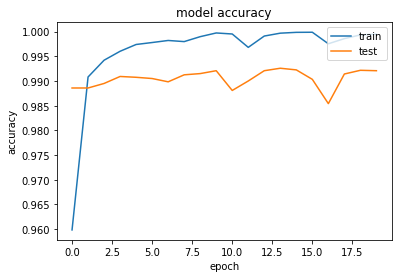

In [23]:
# 단순 정확도에 대한 히스토리 요약
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

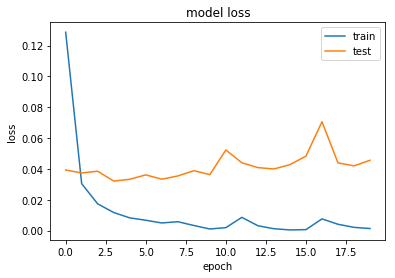

In [24]:
# 손실에 대한 히스토리 요약
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()